# Causal impact analyses

In [1]:
# install.packages("CausalImpact")
library('CausalImpact')
library(ggplot2)
library("missForest")
require("reticulate")
source_python("pickle_reader.py")
library("utils")
library(doParallel)
library(foreach)

Loading required package: bsts

Loading required package: BoomSpikeSlab

Loading required package: Boom


Attaching package: ‘Boom’


The following object is masked from ‘package:stats’:

    rWishart



Attaching package: ‘BoomSpikeSlab’


The following object is masked from ‘package:stats’:

    knots


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: xts


Attaching package: ‘bsts’


The following object is masked from ‘package:BoomSpikeSlab’:

    SuggestBurn


Loading required package: reticulate

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [17]:
library('CausalImpact')
library(ggplot2)
library("missForest")
require("reticulate")
source_python("pickle_reader.py")
library("utils")
library(doParallel)
library(foreach)

ndvi_1994_data <- read_pickle_file("../../working/ndvi_1994_data")
t <- seq.Date(as.Date("1984-07-01"), by = "years", length.out = 30)

n_row <- 30
n_iteration <- length(ndvi_1994_data)

calculate_recovery <- function(data, t) {
  tryCatch({
  local_matrix <- matrix(NA, nrow = 1, ncol = 5)
  imputed_data <- missForest(data)
  imputed_data <- imputed_data[1]$ximp
  y <- imputed_data[, 1]
  X <- rowMeans(imputed_data[, 2:dim(imputed_data)[2]], 1)
  data_ts_ave <- zoo(cbind(y, X), t)

  pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
  post.period <- as.Date(c("1994-07-01", "2013-07-01"))

  impact <- CausalImpact(data_ts_ave, pre.period, post.period)
  local_matrix[1, 1] <- impact$summary$Actual[1]
  local_matrix[1, 2] <- impact$summary$Pred[1]
  local_matrix[1, 3] <- impact$summary$AbsEffect[1]
  local_matrix[1, 4] <- impact$summary$RelEffect[1]
  local_matrix[1, 5] <- impact$summary$p[1]
  return(list(local_matrix = local_matrix, y = y,X=X))},
  error=function(err){return(NA)})
}

cl <- makeCluster(detectCores())
registerDoParallel(cl)
clusterEvalQ(cl, {
  library(missForest)
  library(zoo)
  library(CausalImpact)
})

# Use .combine = "rbind" to combine results into matrices
results <- foreach(i = 1:n_iteration, .combine = "rbind") %dopar% {
  data <- ndvi_1994_data[i]
  data <- matrix(unlist(data), nrow = 30)
  calculate_recovery(data, t)
}
stopCluster(cl)

[[1]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[2]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[3]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[4]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[5]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[6]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[7]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[8]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[9]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[10]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[11]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[12]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[13]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[14]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[15]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods"       "base"         

[[16]]
 [1] "CausalImpact"  "bsts"          "xts"           "BoomSpikeSlab"
 [5] "Boom"          "zoo"           "missForest"    "stats"        
 [9] "graphics"      "grDevices"     "utils"         "datasets"     
[13] "methods" 

In [18]:
ci_results <- results[, 1]
y_results <- results[, 2]
X_results <- results[, 3]
ci = matrix(,nrow=n_iteration,ncol=5)
y = matrix(,nrow=n_row,ncol=n_iteration)
X = matrix(,nrow=n_row,ncol=n_iteration)
for(i in 1:n_iteration){
   ci[i,]=matrix(ci_results)[[i,1]]
   y[,i] = matrix(y_results)[[1,1]]
   X[,i] = matrix(X_results)[[1,1]]
}

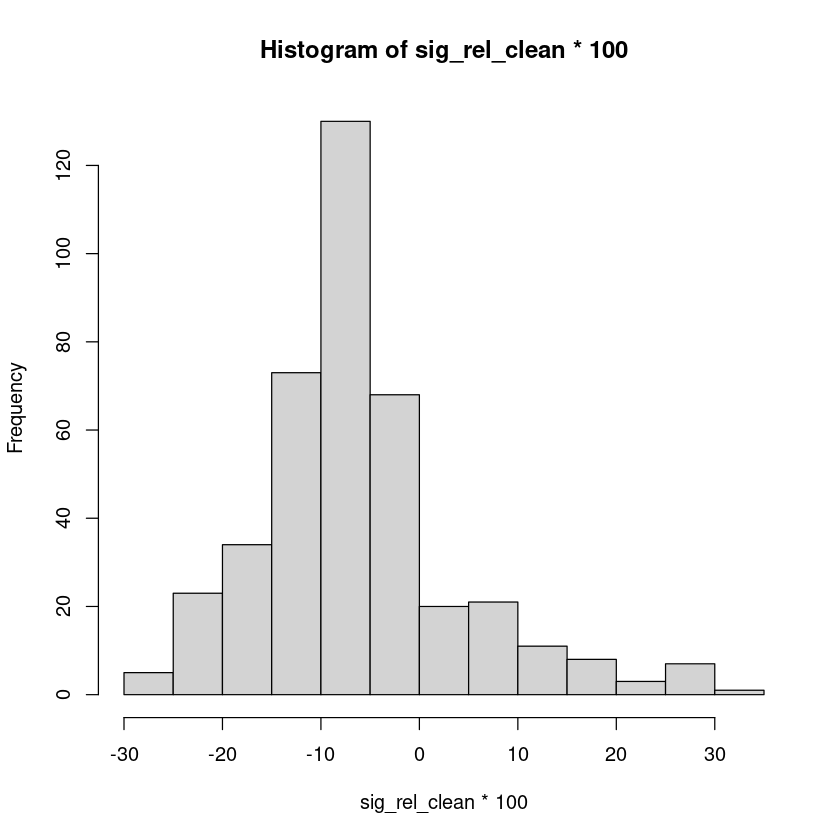

In [46]:
zscore <- function(data,std){
    (abs(data-mean(data))/sd(data))
}
ci_na <- apply(ci, 1, function(row) all(is.na(row)))
ci_no_nan =ci[ci_na==FALSE,] 
sig = ci_no_nan[,5]<0.01
sig_rel = ci_no_nan[sig,4]
sig_rel_clean = sig_rel[(zscore(sig_rel)<3)]
hist(sig_rel_clean*100)

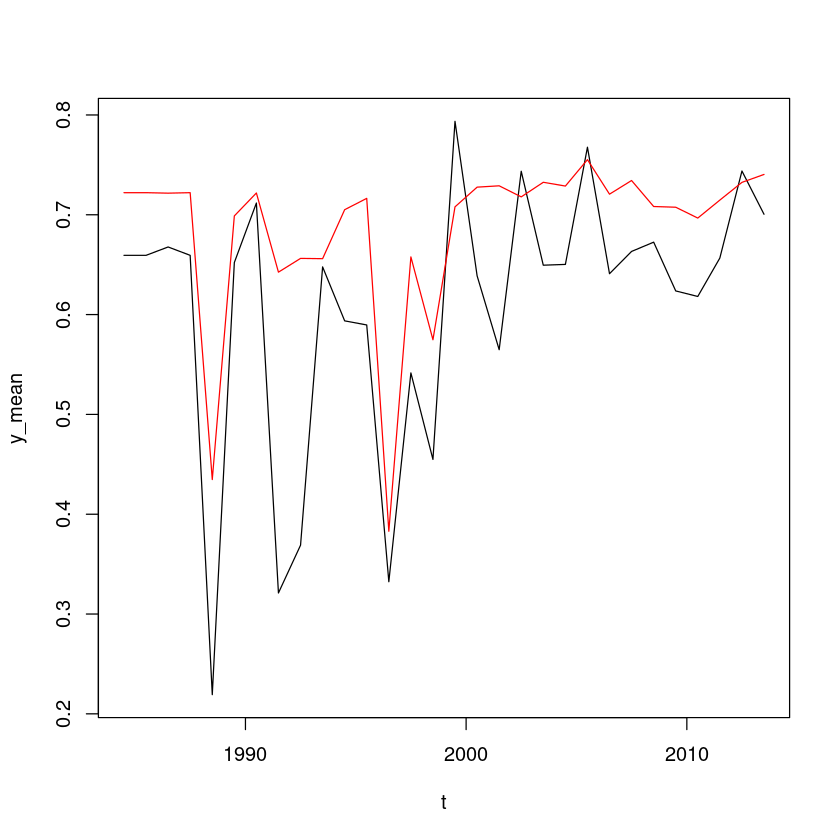

In [50]:
y_mean = rowMeans(y,na.rm=TRUE)
X_mean = rowMeans(X,na.rm=TRUE)
plot(t,y_mean,'l')
lines(t,X_mean,col="red")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 0.63. In the absence of an intervention, we would have expected an average response of 0.60. The 95% interval of this counterfactual prediction is [0.53, 0.67]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 0.033 with a 95% interval of [-0.033, 0.099]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 12.64. Had the intervention not taken place, we would have expected a sum of 11.97. The 95% interval of this prediction is [10.66, 13.30].

The above results are given in terms of absolute numbers. In relative terms, the response variable showed an increase of +6%. The 9

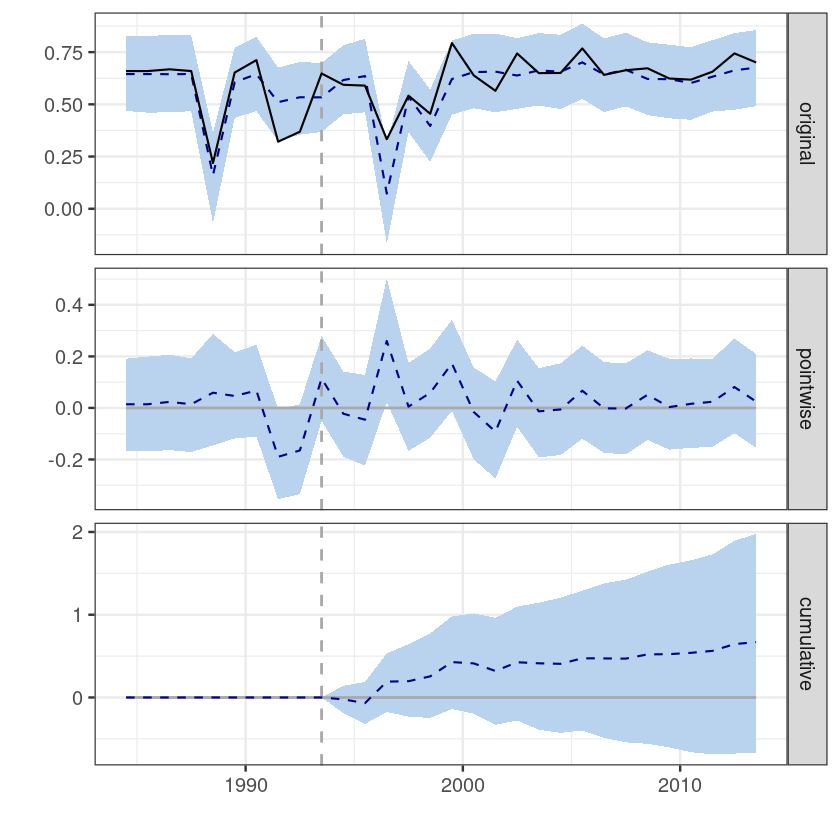

In [55]:

set.seed(1)
y_mean = rowMeans(y,na.rm=TRUE)
X_mean = rowMeans(X,na.rm=TRUE)

data_mean = zoo(cbind(y_mean,X_mean),t)
pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
post.period <- as.Date(c("1994-07-01", "2013-07-01"))
impact <- CausalImpact(data_mean, pre.period, post.period)
plot(impact)
print(summary(impact,"report"))

Posterior inference {CausalImpact}

                         Average         Cumulative    
Actual                   0.63            12.64         
Prediction (s.d.)        0.6 (0.035)     12.0 (0.705)  
95% CI                   [0.53, 0.67]    [10.61, 13.37]
                                                       
Absolute effect (s.d.)   0.033 (0.035)   0.669 (0.705) 
95% CI                   [-0.037, 0.1]   [-0.733, 2.0] 
                                                       
Relative effect (s.d.)   6% (6.3%)       6% (6.3%)     
95% CI                   [-5.5%, 19%]    [-5.5%, 19%]  

Posterior tail-area probability p:   0.17335
Posterior prob. of a causal effect:  83%

For more details, type: summary(impact, "report")

NULL


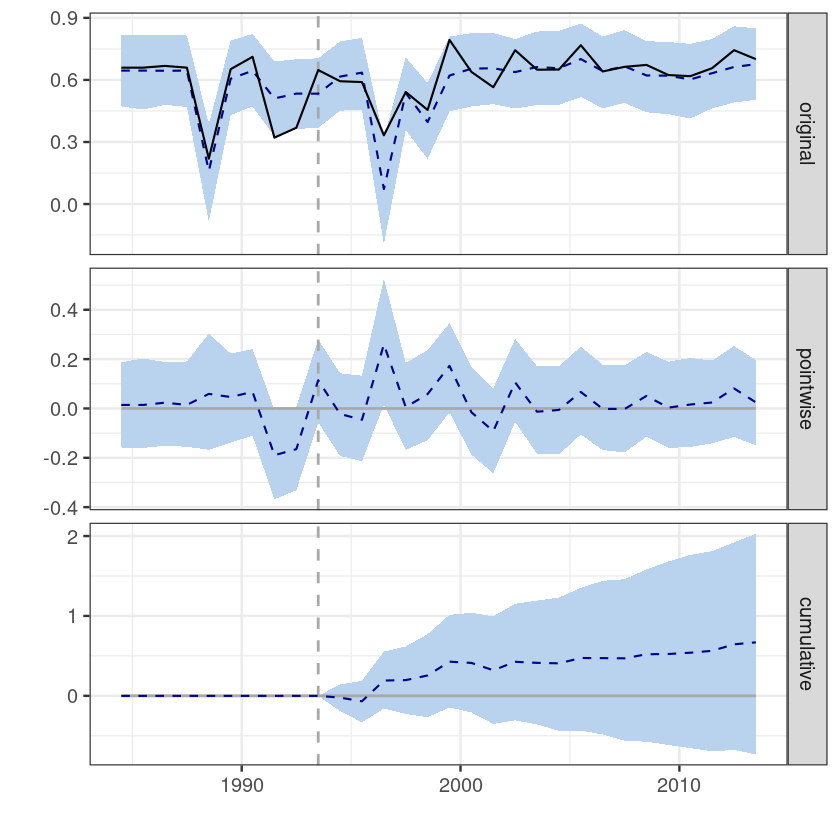

In [53]:
y_mean = rowMeans(y,na.rm=TRUE)
X_mean = rowMeans(X,na.rm=TRUE)

data_mean = zoo(cbind(y_mean,X_mean),t)
pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
post.period <- as.Date(c("1994-07-01", "2013-07-01"))
impact <- CausalImpact(data_mean, pre.period, post.period)
plot(impact)
print(summary(impact))

In [29]:
ci[sig,4]

[1]  0.19400130  0.06127123 -0.10225235  0.05003039  0.05286183 -0.02809136
  [7] -0.05281884  0.03183864 -0.06510587 -0.09272707  0.06200385 -0.05023185
 [13]  0.01911140 -0.09193215 -0.03970651 -0.04758483 -0.02674641  0.13633631
 [19]  0.06876557 -0.04176254 -0.09780885  0.14705287 -0.05769900 -0.11909921
 [25] -0.15070068 -0.04374251 -0.09280450 -0.02448758 -0.10576849 -0.03928227
 [31] -0.08034123 -0.08382185 -0.01978619 -0.11066228 -0.12940291 -0.09027101
 [37] -0.08150597 -0.03687802 -0.04260510 -0.11622851  0.02244286 -0.06338056
 [43]  0.04662071 -0.03576959  0.07911256  0.19932740 -0.04286956 -0.07930093
 [49] -0.03338994  0.07126624 -0.05775723  0.01944993  0.12287088  0.21657485
 [55] -0.08308893 -0.08028273  0.05353549 -0.04282036 -0.02963799 -0.08381344
 [61] -0.07923902 -0.01737110 -0.03498199  0.04460402 -0.15782108 -0.08223059
 [67] -0.03851986 -0.06315500 -0.09285712 -0.01986518  0.05303558 -0.07163802
 [73] -0.05736745 -0.03948845 -0.05525971 -0.17073454  0.03388283 -0.07115098
 [79]  0.04069979  0.09209239 -0.05635575  2.58673630 -0.07418297 -0.04552594
 [85] -0.03775372 -0.05948097  0.04821283 -0.04795642 -0.05108131 -0.06067159
 [91]  0.08575796 -0.12153687 -0.05277669  0.10652640  0.08191541 -0.03236310
 [97] -0.03466725  0.04354671          NA -0.06530871          NA          NA
[103]          NA -0.08505308          NA          NA          NA -0.04404905
[109]          NA -0.05245491 -0.06477009          NA          NA          NA
[115]          NA  0.09195997          NA          NA -0.06998213 -0.04927657
[121] -0.03498669  0.07748217  0.03314868 -0.01695356 -0.23410100 -0.15739649
[127] -0.04201029 -0.15653456 -0.04835288 -0.06872691 -0.04759675  0.01733023
[133] -0.05619576 -0.06148907 -0.01637564 -0.07274157 -0.05979691 -0.03881678
[139] -0.06266498 -0.07932517 -0.08100195 -0.01366494 -0.03075565 -0.07365867
[145] -0.18961830 -0.07222700 -0.19200966 -0.04379288 -0.02770944 -0.12870289
[151] -0.05526618 -0.08906621 -0.09930599 -0.10847315 -0.06370605 -0.21025205
[157]  0.20085610  0.04484494 -0.11848273 -0.13615111 -0.08649723 -0.05625188
[163] -0.05841190 -0.07857338 -0.01873390 -0.09321765 -0.02600593 -0.25871817
[169] -0.08848792  0.05978026 -0.14482244 -0.05987724 -0.13596142 -0.12098668
[175] -0.22559899 -0.08732697 -0.13694176 -0.11448701 -0.10316148 -0.13832607
[181] -0.13788076 -0.04826683 -0.06180884 -0.11497201 -0.08176685 -0.17438597
[187] -0.03981996  0.27442049 -0.07206725 -0.05476910 -0.07386064 -0.06756764
[193] -0.14683032 -0.03995379 -0.18072236 -0.10734349  0.03946655 -0.03654853
[199] -0.05342532 -0.08478924 -0.07530233 -0.07439366 -0.05805040 -0.13065232
[205] -0.04263771 -0.14127236 -0.10407360 -0.06050912 -0.19403708 -0.23637014
[211] -0.13258555 -0.12730202 -0.05069350 -0.11570676 -0.21667630 -0.13942678
[217] -0.06402626 -0.10810970  0.06788478 -0.04169918 -0.19965945 -0.06593919
[223] -0.11088625 -0.15249460 -0.06204847 -0.10199368 -0.07712047 -0.12753019
[229] -0.03334684 -0.06781341 -0.16237979 -0.25408538 -0.13683599 -0.12102601
[235] -0.04121705 -0.08350219  0.06282525 -0.16915399 -0.14973960 -0.18008311
[241] -0.06386296 -0.08906033 -0.06381109 -0.06088904  0.56056819  0.13990589
[247] -0.07930950 -0.17706710 -0.06017714 -0.09798324 -0.17048852  0.54525976
[253] -0.12484368 -0.14757409 -0.08106802 -0.10526231 -0.11063998 -0.07801682
[259] -0.13476614 -0.06605551 -0.05538943 -0.05224312 -0.08553878 -0.09643057
[265] -0.07887967  0.16652279 -0.04108172 -0.22988803 -0.05607000 -0.04322399
[271] -0.27330017 -0.07296668 -0.28217120  0.04159205 -0.04435574  0.11950773
[277] -0.08848495 -0.02657047 -0.11006702 -0.09352706 -0.03855087  0.19387379
[283] -0.18470697 -0.10470816 -0.08369628 -0.09904939 -0.08454690 -0.06032287
[289] -0.09522127 -0.17721802 -0.15925849 -0.03791837 -0.21118215 -0.20835078
[295]  0.14245837 -0.21383819 -0.20479244 -0.11433837 -0.14220281 -0.19048719
[301] -0.16506454 -0.13388842 -0.24756575 -0.09055661 -0.10963056 -0.13795222
[307] -0.21195486 -0.185

# Read Data

In [ ]:
library('CausalImpact')
library(ggplot2)
library("missForest")
require("reticulate")
source_python("pickle_reader.py")
library("utils")
library(doParallel)
library(foreach)

ndvi_1994_data <- read_pickle_file("../../working/ndvi_1994_data")
t <- seq.Date(as.Date("1984-07-01"), by = "years", length.out = 30)


n_row=30
n_iteration=3

ci_results = matrix(,nrow=n_iteration,ncol=5)
y_results = matrix(,nrow=n_row,ncol=n_iteration)

calculate_recovery <- function(data,t){
    local_matrix = matrix(,nrow= 1,ncol=5)
    imputed_data<-missForest(data)
    imputed_data<-imputed_data[1]$ximp
    y <- imputed_data[,1]
    X <- rowMeans(imputed_data[,2:dim(imputed_data)[2]],1)
    data_ts_ave = zoo(cbind(y,X),t)

    pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
    post.period <- as.Date(c("1994-07-01", "2013-07-01"))

    impact <- CausalImpact(data_ts_ave, pre.period, post.period)
    local_matrix[1,1] = impact$summary$Actual[1]
    local_matrix[1,2] = impact$summary$Pred[1]
    local_matrix[1,3] = impact$summary$AbsEffect[1]
    local_matrix[1,4] = impact$summary$RelEffect[1]
    local_matrix[1,5] = impact$summary$p[1]
    return(list(local_matrix = local_matrix, y = y))
    }
ci_results = matrix(,nrow=n_iteration,ncol=5)
y_results = matrix(,nrow=n_row,ncol=n_iteration)


cl <- makeCluster(detectCores())
registerDoParallel(cl)
clusterEvalQ(cl, {
  library(missForest)
  library(zoo)
  library(CausalImpact)
})

# foreach(i = 1:n_iteration) %dopar% {
#     data <- ndvi_1994_data[i]
#     data<-matrix(unlist(data),nrow=30)
#     results = calculate_recovery(data,t)
#     ci_results[i,] = results$local_matrix
#     y_results[,i] = results$y        
# }

result_index <- 1

foreach(i = 1:n_iteration) %dopar% {
  data <- ndvi_1994_data[i]
  data <- matrix(unlist(data), nrow = 30)
  results <- calculate_recovery(data, t)
  
  # Store results in y_results at the appropriate index
  y_results[, result_index] <- results$y
  result_index <- result_index + 1
  
  results$local_matrix
}

stopCluster(cl)

# for(i in 1:n_iteration){
#     data <- ndvi_1994_data[i]
#     data<-matrix(unlist(data),nrow=30)
#     results = calculate_recovery(data,t)
#     ci_results[i,] = results$local_matrix
#     y_results[,i] = results$y        
#     }


In [ ]:
ci_results

In [ ]:
ci_results = matrix(,nrow=n_iteration,ncol=5)
y_results = matrix(,nrow=n_row,ncol=n_iteration)


cl <- makeCluster(detectCores())
registerDoParallel(cl)
clusterEvalQ(cl, {
  library(missForest)
  library(zoo)
  library(CausalImpact)
})

foreach(i = 1:n_iteration) %dopar% {
    data <- ndvi_1994_data[i]
    data<-matrix(unlist(data),nrow=30)
    results = calculate_recovery(data,t)
    ci_results[i,] = results$local_matrix
    y_results[,i] = results$y        
}

stopCluster(cl)


In [ ]:
ndvi_1994_mean <- read_pickle_file("../../working/ndvi_changed_mean_1994")
ndvi_1994_data <- read_pickle_file("../../working/ndvi_1994_data")
t <- seq.Date(as.Date("1984-07-01"), by = "years", length.out = 30)

In [ ]:
cl <- makeCluster(detectCores())
registerDoParallel(cl)
clusterEvalQ(cl, {
  library(missForest)
  library(zoo)
  library(CausalImpact)
})

ci_results = matrix(,nrow=n_iteration,ncol=5)
y_results = matrix(,nrow=n_row,ncol=n_iteration)

foreach(i = 1:n_iteration) %dopar% {
    data <- ndvi_1994_data[i]
    data<-matrix(unlist(data),nrow=30)
    results = calculate_recovery(data,t)
    ci_results[i,] = results$local_matrix
    y_results[,i] = results$y        
}

stopCluster(cl)

In [ ]:
# Load required libraries
library('CausalImpact')
library(ggplot2)
library("missForest")
require("reticulate")
source_python("pickle_reader.py")
library("utils")
library(doParallel)
library(foreach)

# Set the number of cores for parallel processing
num_cores <- 4  # Adjust as needed

# Initialize parallel processing
cl <- makeCluster(num_cores)
registerDoParallel(cl)
clusterEvalQ(cl, {
  library(missForest)
  library(zoo)
  library(CausalImpact)
})

# Load the data
ndvi_1994_data <- read_pickle_file("../../working/ndvi_1994_data")
t <- seq.Date(as.Date("1984-07-01"), by = "years", length.out = 30)

n_row <- 30
n_iteration <- 3

# Initialize results matrices
ci_results <- matrix(NA, nrow = n_iteration, ncol = 5)
y_results <- matrix(NA, nrow = n_row, ncol = n_iteration)

# Define the function for parallel processing
calculate_recovery_parallel <- function(i) {
  data <- ndvi_1994_data[[i]]
  data <- matrix(unlist(data), nrow = 30)
  results <- calculate_recovery(data, t)
  
  # Update the results within the loop using 'assign'
  assign(paste0("ci_results[", i, ",]"), results$local_matrix, envir = .GlobalEnv)
  assign(paste0("y_results[,", i, "]"), results$y, envir = .GlobalEnv)
}

# Parallelize the loop
foreach(i = 1:n_iteration, .packages = c("CausalImpact", "zoo", "missForest")) %dopar% {
  calculate_recovery_parallel(i)
}

# Stop parallel processing
stopCluster(cl)

In [ ]:
ci_results

In [ ]:
k=87
data <- ndvi_1994_data[k]
data<-matrix(unlist(data),nrow=30)
res = calculate_recovery(data,t)
res$local_matrix
res$y

In [ ]:
num_cores <- parallel::detectCores()

# Initialize parallel processing
cl <- makeCluster(num_cores)
registerDoParallel(cl)
clusterEvalQ(cl, {
  library(missForest)
  library(zoo)
  library(CausalImpact)
})

total_iterations <- 10

ci_list <- list()
y_list <- list()
matrix_rows <- 30

# Initialize an empty list to accumulate results
result_list <- list()

# Run the loop in parallel
foreach(i = 1:total_iterations) %dopar% {
  data <- ndvi_1994_data[i]
  data <- matrix(unlist(data), nrow = matrix_rows)
  
  # Perform the work and fill the local matrix, and get y
  results <- calculate_recovery(data,t)
  
  ci_list[[i]] <- results$local_matrix
  y_list[[i]] <- results$y
  # Update the progress bar (optional)
  # setTxtProgressBar(pb, getTxtProgressBar(pb) + 1)
  
  # return(results)
}


In [ ]:
length(ci_list)

In [ ]:
set.seed(15)
t <- seq.Date(as.Date("1984-07-01"), by = "years", length.out = 30)
data <- zoo(ndvi_1994_mean, t)
pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
post.period <- as.Date(c("1994-07-01", "2013-07-01"))
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
print(summary(impact))

In [ ]:
calculate_recovery <- function(data){
    local_matrix = matrix(,nrow= 1,ncol=5)
    
    # Update the progress bar for this iteration
    # all_columns_na <- apply(data, 1, function(row) all(is.na(row)))
    # t_na_rm = t[all_columns_na==FALSE]
    # data_na_rm = data[all_columns_na==FALSE,]
    imputed_data<-missForest(data)
    imputed_data<-imputed_data[1]$ximp

    # data_ts <- zoo(imputed_data, t)
    # ave = rowMeans(data_ts[,2:dim(data_ts)[2]],1)
    y <- imputed_data[,1]
    X <- rowMeans(imputed_data[,2:dim(imputed_data)[2]],1)
    # data_ts_ave = zoo(cbind(y,X),t)
    print(length(y))
    print(length(X))
    print(length(t))
    flush.console()
    # pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
    # post.period <- as.Date(c("1994-07-01", "2013-07-01"))

    # impact <- CausalImpact(data_ts_ave, pre.period, post.period)
    # # impact2 <- CausalImpact(data_ts, pre.period, post.period)

    # local_matrix[1,1] = impact$summary$Actual[1]
    # local_matrix[1,2] = impact$summary$Pred[1]
    # local_matrix[1,3] = impact$summary$AbsEffect[1]
    # local_matrix[1,4] = impact$summary$RelEffect[1]
    # local_matrix[1,5] = impact$summary$p[1]
    
    # return(list(local_matrix = local_matrix, y = y))

    # res2[k,1] = impact2$summary$Actual[1]
    # res2[k,2] = impact2$summary$Pred[1]
    # res2[k,3] = impact2$summary$AbsEffect[1]
    # res2[k,4] = impact2$summary$RelEffect[1]
    # res2[k,5] = impact2$summary$p[1]

}        


In [ ]:
k=87
data <- ndvi_1994_data[k]
data<-matrix(unlist(data),nrow=30)
res = calculate_recovery(data)
# res$local_matrix
# res$y

In [ ]:
num_cores <- parallel::detectCores()

# Initialize parallel processing
cl <- makeCluster(num_cores)
registerDoParallel(cl)

total_iterations <- 10
# create_pb <- function(total) {
#   pb <- txtProgressBar(min = 0, max = total, style = 3)
#   on.exit(close(pb))
#   return(pb)
# }

In [ ]:
matrix_rows <- 30
y=matrix(,nrow=30,ncol=total_iterations)
x=matrix(,nrow=30,ncol=total_iterations)
# result_matrix <- matrix(0, nrow = total_iterations, ncol = 5)

# pb <- create_pb(total_iterations)

matrix_list <- list()

matrix_list <- foreach(i = 1:total_iterations, .combine = rbind) %dopar% {
  # Perform the work and fill the local matrix
  data <- ndvi_1994_data[i]
  data<-matrix(unlist(data),nrow=30)
  results <- calculate_recovery(data)
  # Update the progress bar for this iteration
  # setTxtProgressBar(pb, getTxtProgressBar(pb) + 1)
  
  return(list(ci = results$local_matrix,y=results$y))
}

In [ ]:
ci_list <- list()
y_list <- list()

matrix_rows <- 30
# Initialize an empty list to accumulate results
result_list <- list()

# Run the loop in parallel
result_list <- foreach(i = 1:total_iterations, .combine = 'list') %dopar% {
  data <- ndvi_1994_data[i]
  data <- matrix(unlist(data), nrow = matrix_rows)
  
  # Perform the work and fill the local matrix, and get y
  results <- calculate_recovery(data)
  
  ci_list[[i]] <- results$local_matrix
  y_list[[i]] <- results$y
  # Update the progress bar (optional)
  # setTxtProgressBar(pb, getTxtProgressBar(pb) + 1)
  
  # return(results)
}

In [ ]:
print(y_list)

In [ ]:
result_matrix <- do.call(rbind, matrix_list)
result_matrix

In [ ]:
local_matrix <- calculate_recovery(ndvi_1994_data,1)
print(local_matrix)

In [ ]:
total_iterations <- 100  # One iteration per worker
pb <- create_pb(total_iterations)


In [ ]:
res=matrix(,nrow=length(ndvi_1994_data),ncol=5)
res2=matrix(,nrow=length(ndvi_1994_data),ncol=5)
y=matrix(NA,nrow=30,ncol=length(ndvi_1994_data))
X=matrix(NA,nrow=30,ncol=length(ndvi_1994_data))

pb <- create_pb(total_iterations)
foreach(i = 1:total_iterations) %dopar% {
  calculate_recovery(i)
}

In [ ]:
# total_iterations <- length(ndvi_1994_data)
# pb <- txtProgressBar(min = 0, max = total_iterations, style = 3)

# set.seed(123)
res=matrix(,nrow=length(ndvi_1994_data),ncol=5)
res2=matrix(,nrow=length(ndvi_1994_data),ncol=5)
y=matrix(NA,nrow=30,ncol=length(ndvi_1994_data))
X=matrix(NA,nrow=30,ncol=length(ndvi_1994_data))

for(k in 1:8){
# for(k in 1:5){
    tryCatch({
        data=ndvi_1994_data[k]
        data<-matrix(unlist(data),nrow=30)
        # all_columns_na <- apply(data, 1, function(row) all(is.na(row)))
        # t_na_rm = t[all_columns_na==FALSE]
        # data_na_rm = data[all_columns_na==FALSE,]
        imputed_data<-missForest(data)
        imputed_data<-imputed_data[1]$ximp

        # data_ts <- zoo(imputed_data, t)
        # ave = rowMeans(data_ts[,2:dim(data_ts)[2]],1)
        y[,k] <- imputed_data[,1]
        X[,k] = rowMeans(imputed_data[,2:dim(imputed_data)[2]],1)
        data_ts_ave = zoo(cbind(y[,k],X[,k]),t)
        pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
        post.period <- as.Date(c("1994-07-01", "2013-07-01"))
        impact <- CausalImpact(data_ts_ave, pre.period, post.period)
        impact2 <- CausalImpact(data_ts, pre.period, post.period)

        res[k,1] = impact$summary$Actual[1]
        res[k,2] = impact$summary$Pred[1]
        res[k,3] = impact$summary$AbsEffect[1]
        res[k,4] = impact$summary$RelEffect[1]
        res[k,5] = impact$summary$p[1]

        res2[k,1] = impact2$summary$Actual[1]
        res2[k,2] = impact2$summary$Pred[1]
        res2[k,3] = impact2$summary$AbsEffect[1]
        res2[k,4] = impact2$summary$RelEffect[1]
        res2[k,5] = impact2$summary$p[1]
        print(impact)
        flush.console()},
                
    error=function(err){return(NA)})
}

In [ ]:
res_impact = matrix(,nrow=length(ndvi_1994_data),ncol=5)

for(k in 1:8){
data=ndvi_1994_data[k]
data<-matrix(unlist(data),nrow=30)
imputed_data<-missForest(data)
imputed_data<-imputed_data[1]$ximp
data_ts <- zoo(imputed_data, t)

ave = rowMeans(data_ts[,2:dim(data_ts)[2]],1)
y[,k] <- imputed_data[,1]
X[,k] = rowMeans(imputed_data[,2:dim(imputed_data)[2]],1)
data_ts_ave = zoo(cbind(y[,k],X[,k]),t)
pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
post.period <- as.Date(c("1994-07-01", "2013-07-01"))
impact <- CausalImpact(data_ts_ave, pre.period, post.period)

impact2 <- CausalImpact(data_ts, pre.period, post.period)
res_impact[k,1] = impact$summary$Actual[1]
res_impact[k,2] = impact$summary$Pred[1]
res_impact[k,3] = impact$summary$AbsEffect[1]
res_impact[k,4] = impact$summary$RelEffect[1]
res_impact[k,5] = impact$summary$p[1]

res2[k,1] = impact2$summary$Actual[1]
res2[k,2] = impact2$summary$Pred[1]
res2[k,3] = impact2$summary$AbsEffect[1]
res2[k,4] = impact2$summary$RelEffect[1]
res2[k,5] = impact2$summary$p[1]
print(res[k,])
}

In [ ]:
res_impact[1:9,]

In [ ]:
library(doParallel)
library(foreach)
library(missForest)
library(zoo)
library(CausalImpact)

In [ ]:
library(doParallel)
library(foreach)
library(missForest)
library(zoo)
library(CausalImpact)

# Define the number of cores (adjust as needed)
num_cores <- 4

# Initialize parallel processing
cl <- makeCluster(num_cores)
registerDoParallel(cl)
clusterEvalQ(cl, {
  library(missForest)
  library(zoo)
  library(CausalImpact)
})

# Define the dimensions of the matrix
matrix_rows <- 30
matrix_cols <- 8  # Adjust to match your data

# Create a progress bar function
create_pb <- function(total) {
  pb <- txtProgressBar(min = 0, max = total, style = 3)
  on.exit(close(pb))
  return(pb)
}

# Initialize result matrices
y <- matrix(0, nrow = matrix_rows, ncol = matrix_cols)
X <- matrix(0, nrow = matrix_rows, ncol = matrix_cols)
res_impact <- matrix(0, nrow = matrix_cols, ncol = 5)
res2 <- matrix(0, nrow = matrix_cols, ncol = 5)

# Create the progress bar
total_iterations <- matrix_cols
pb <- create_pb(total_iterations)

# Run the loop in parallel
result_list <- foreach(k = 1:total_iterations, .combine = 'rbind') %dopar% {
  setTxtProgressBar(pb, getTxtProgressBar(pb) + 1)
  data <- ndvi_1994_data[k]
  data <- matrix(unlist(data), nrow = matrix_rows)
  
  # Perform your data processing here
  imputed_data<-missForest(data)
  imputed_data<-imputed_data[1]$ximp

  y <- imputed_data[,1]
  X <- rowMeans(imputed_data[,2:dim(imputed_data)[2]],1)
  data_ts_ave = zoo(cbind(y,X),t)
  pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
  post.period <- as.Date(c("1994-07-01", "2013-07-01"))
  impact <- CausalImpact(data_ts_ave, pre.period, post.period)

  # Return the results for this iteration as a row
  return(c(impact$summary$Actual[1], impact$summary$Pred[1], impact$summary$AbsEffect[1], impact$summary$RelEffect[1], impact$summary$p[1]))
}

# Stop parallel processing
stopCluster(cl)

# Combine the individual results into a matrix
result_matrix <- matrix(unlist(result_list), nrow = total_iterations, byrow = TRUE)

# Print the result matrix
print(result_matrix)

In [ ]:
zscore <- function(data,std){
    (abs(data-mean(data))/sd(data))
}
res_na <- apply(res, 1, function(row) all(is.na(row)))
res_no_nan =res[res_na==FALSE,] 
sig = res_no_nan[,5]<0.01
sig_rel = res_no_nan[sig,4]
sig_rel_clean = sig_rel[(zscore(sig_rel)<3)]
hist(sig_rel_clean*100)

In [ ]:
set.seed(1)
y_mean = rowMeans(y,na.rm=TRUE)
X_mean = rowMeans(X,na.rm=TRUE)

data_mean = zoo(cbind(y_mean,X_mean),t)
pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
post.period <- as.Date(c("1994-07-01", "2013-07-01"))
impact <- CausalImpact(data_mean, pre.period, post.period)
plot(impact)
print(summary(impact,"report"))

In [ ]:
res2_na <- apply(res2, 1, function(row) all(is.na(row)))
res2_no_nan =res2[res2_na==FALSE,] 
sig2 = res2_no_nan[,5]<0.05
sig2_rel = res2_no_nan[sig2,4]
# sig2_rel_clean = sig2_rel[(zscore(sig2_rel)<3)]
# hist(sig2_rel_clean*100)

In [ ]:
d[132,]

In [ ]:
which(is.na(res[,5]))

In [ ]:
res[]

In [ ]:
k=211
print(k)
flush.console()
tryCatch({
    data=ndvi_1994_data[k]
    data<-matrix(unlist(data),nrow=30)
    all_columns_na <- apply(data, 1, function(row) all(is.na(row)))
    t_na_rm = t[all_columns_na==FALSE]
    data_na_rm = data[all_columns_na==FALSE,]
    length(t_na_rm)
    plot(t_na_rm,data_na_rm[,1],'l')
    lines(t_na_rm,data_na_rm[,2],col='red')
    imputed_data<-missForest(data_na_rm)
    imputed_data<-imputed_data[1]$ximp

    data_ts <- zoo(imputed_data, t_na_rm)
    ave = rowMeans(data_ts[,2:dim(data_ts)[2]],1)
    y <- data_ts[,1]
    data_ts_ave = zoo(cbind(y,ave),t_na_rm)
    pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
    post.period <- as.Date(c("1994-07-01", "2013-07-01"))
    impact <- CausalImpact(data_ts_ave, pre.period, post.period)
    res[k,1] = impact$summary$Actual[1]
    res[k,2] = impact$summary$Pred[1]
    res[k,3] = impact$summary$AbsEffect[1]
    res[k,4] = impact$summary$RelEffect[1]
    res[k,5] = impact$summary$p[1]

    res2[k,1] = impact2$summary$Actual[1]
    res2[k,2] = impact2$summary$Pred[1]
    res2[k,3] = impact2$summary$AbsEffect[1]
    res2[k,4] = impact2$summary$RelEffect[1]
    res2[k,5] = impact2$summary$p[1]},
    
    error=function(err){
        return(NA)
    })
# data=ndvi_1994_data[k]
# data<-matrix(unlist(data),nrow=30)
# all_columns_na <- apply(data, 1, function(row) all(is.na(row)))
# t_na_rm = t[all_columns_na==FALSE]
# data_na_rm = data[all_columns_na==FALSE,]
# length(t_na_rm)
# plot(t_na_rm,data_na_rm[,1],'l')
# lines(t_na_rm,data_na_rm[,2],col='red')
# imputed_data<-missForest(data_na_rm)
# imputed_data<-imputed_data[1]$ximp

# data_ts <- zoo(imputed_data, t_na_rm)
# ave = rowMeans(data_ts[,2:dim(data_ts)[2]],1)
# y <- data_ts[,1]
# data_ts_ave = zoo(cbind(y,ave),t_na_rm)
# pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
# post.period <- as.Date(c("1994-07-01", "2013-07-01"))
# impact <- CausalImpact(data_ts_ave, pre.period, post.period)

In [ ]:
res[210,]

In [ ]:
res=matrix(,nrow=length(ndvi_1994_data),ncol=5)
for(i in 1:length(ndvi_1994_data)){
    print(i)
    flush.console()
    data=ndvi_1994_data[i]
    tmp<-matrix(unlist(data),nrow=30)
    tmp_cor = kNN(data=tmp,k=2,imp_var=FALSE)
    data <- zoo(tmp_cor, t)
    pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
    post.period <- as.Date(c("1994-07-01", "2013-07-01"))
    impact <- CausalImpact(data, pre.period, post.period)

    res[i,1] = impact$summary$Actual[1]
    res[i,2] = impact$summary$Pred[1]
    res[i,3] = impact$summary$AbsEffect[1]
    res[i,4] = impact$summary$RelEffect[1]
    res[i,5] = impact$summary$p[1]

}

    